In [1]:
## Importing the libraries
import numpy as np
from scipy import signal
from scipy.signal import convolve2d
from skimage import io
import matplotlib.pyplot as plt
import cv2

## 2 a)

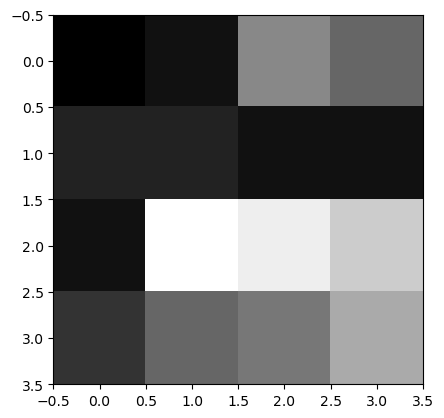

In [2]:
img = np.array([[0, 1, 8, 6], [2, 2, 1, 1], [1, 15, 14, 12], [3, 6, 7, 10]])
plt.imshow(img, cmap='gray')
plt.show()

In [3]:
# Converting image to binary
for i in range(len(img)):
    for j in range(len(img[0])):
        img[i][j] = bin(img[i][j])[2:].zfill(4)
        
# Converting the binary intensity value to planes
   
planes = []

for k in range(4):
    bit_plane = np.zeros((4,4), dtype=int)
    for i in range(len(img)):
        for j in range(len(img[0])):
            bit_plane[i][j] = int(img[i][j]) % 10
            img[i][j] = int(img[i][j]) // 10
    planes.append(bit_plane)

    i = 0
for plane in planes:
    i += 1
    print("plane "+ str(i))
    print(plane)


plane 1
[[0 1 0 0]
 [0 0 1 1]
 [1 1 0 0]
 [1 0 1 0]]
plane 2
[[0 0 0 1]
 [1 1 0 0]
 [0 1 1 0]
 [1 1 1 1]]
plane 3
[[0 0 0 1]
 [0 0 0 0]
 [0 1 1 1]
 [0 1 1 0]]
plane 4
[[0 0 1 0]
 [0 0 0 0]
 [0 1 1 1]
 [0 0 0 1]]


plane 1


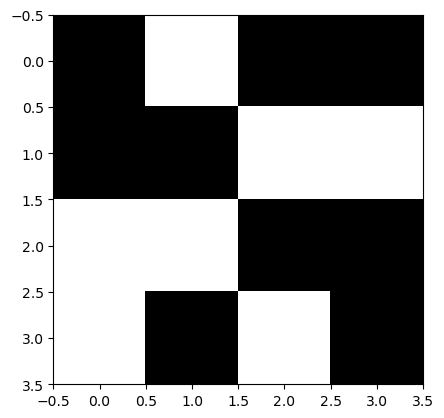

plane 2


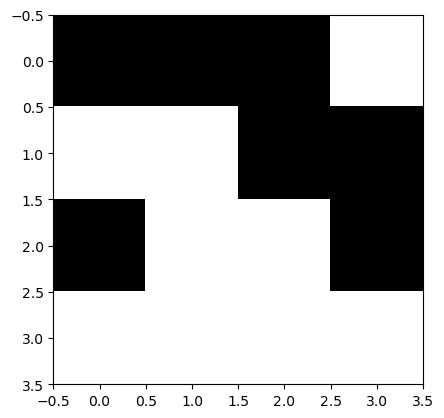

plane 3


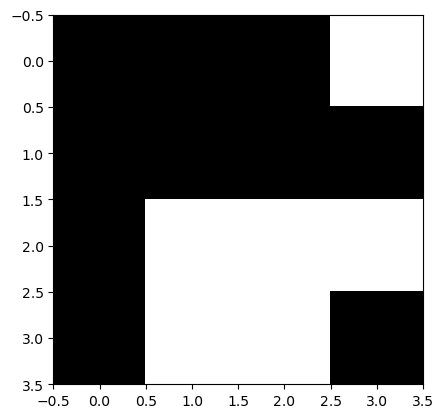

plane 4


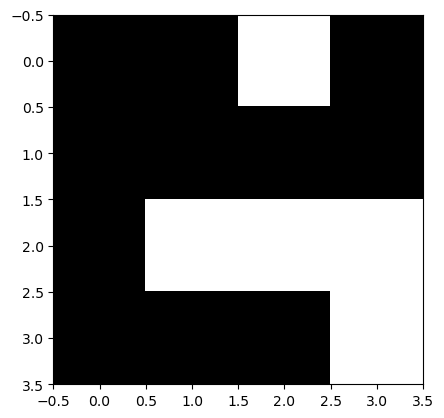

In [4]:
i = 0
for plane in planes:
    i += 1
    print("plane "+ str(i))
    plt.imshow(plane, cmap='gray')
    plt.show()

## b)

In [10]:
reconstructed_Image = np.zeros((4,4), dtype='int')



for plane in reversed(planes):
    reconstructed_Image = reconstructed_Image + plane
    reconstructed_Image = reconstructed_Image*10

reconstructed_Image = reconstructed_Image/10

reconstructed_Image

array([[0.000e+00, 1.000e+00, 1.000e+03, 1.100e+02],
       [1.000e+01, 1.000e+01, 1.000e+00, 1.000e+00],
       [1.000e+00, 1.111e+03, 1.110e+03, 1.100e+03],
       [1.100e+01, 1.100e+02, 1.110e+02, 1.010e+03]])

In [11]:
for i in range(len(reconstructed_Image)):
    for j in range(len(reconstructed_Image[0])):
        decimal = 0
        binary = reconstructed_Image[i][j]
        power = 0
        while binary > 0:
            decimal += (binary % 10) * (2 ** power)
            binary = binary // 10
            power += 1
        reconstructed_Image[i][j] = decimal

reconstructed_Image

array([[ 0.,  1.,  8.,  6.],
       [ 2.,  2.,  1.,  1.],
       [ 1., 15., 14., 12.],
       [ 3.,  6.,  7., 10.]])

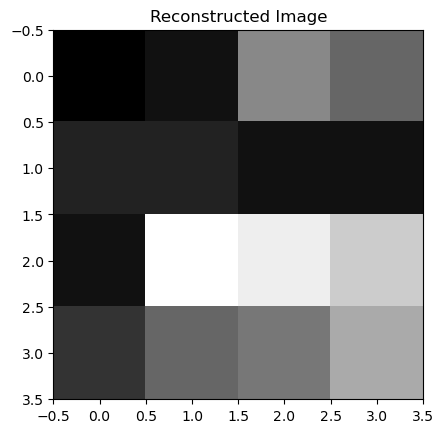

In [12]:
plt.imshow(reconstructed_Image, cmap='gray')
plt.title('Reconstructed Image')

plt.show()

## 8

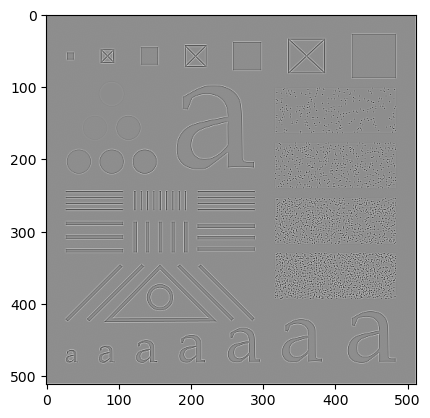

In [6]:

# Load the image
img = io.imread('testpattern.tif', as_gray=True)

# Define the kernel
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

# Perform 2D convolution using zero padding
result = signal.convolve2d(img, kernel, mode='same', boundary='fill', fillvalue=0)

# Save the result
#io.imsave('testpattern_convolved.tif', result)
# show the resulting image
plt.imshow(result, cmap='gray')

## 9

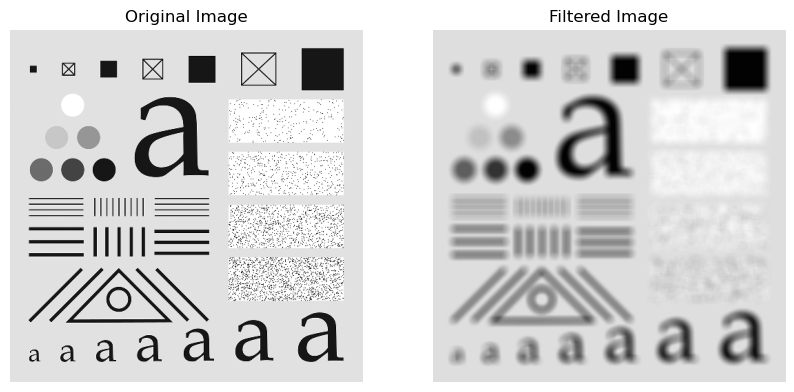

In [7]:
from scipy import ndimage

# Load the image
image = io.imread('testpattern.tif', as_gray=True)

# Define the size of the Gaussian kernel
kernel_size = 15

# Create the Gaussian kernel
kernel = np.outer(np.linspace(-1, 1, kernel_size), np.linspace(-1, 1, kernel_size))
kernel = np.exp(-(kernel**2)/(2.0 * 0.5**2))

# Normalize the kernel so that it sums to 1
kernel /= np.sum(kernel)

# Perform the convolution
filtered_image = ndimage.convolve(image, kernel, mode='reflect')

# Plot the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')
plt.show()


### a) Making Letter 'a' barely visible

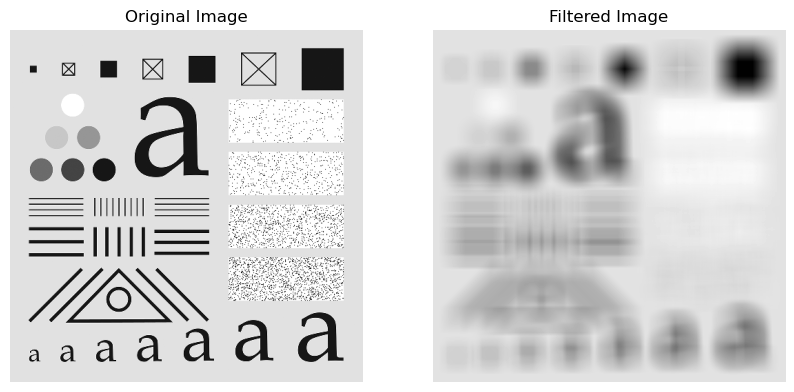

In [8]:
# Load the image
image = io.imread('testpattern.tif', as_gray=True)

# Define the size of the Gaussian kernel
kernel_size = 40

# Create the Gaussian kernel
kernel = np.outer(np.linspace(-1, 1, kernel_size), np.linspace(-1, 1, kernel_size))
kernel = np.exp(-(kernel**2)/(2.0 * 0.8**2))

# Normalize the kernel so that it sums to 1
kernel /= np.sum(kernel)

# Perform the convolution
convolved_image = ndimage.convolve(image, kernel, mode='reflect')

# Plot the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(convolved_image, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')
plt.show()


### b)

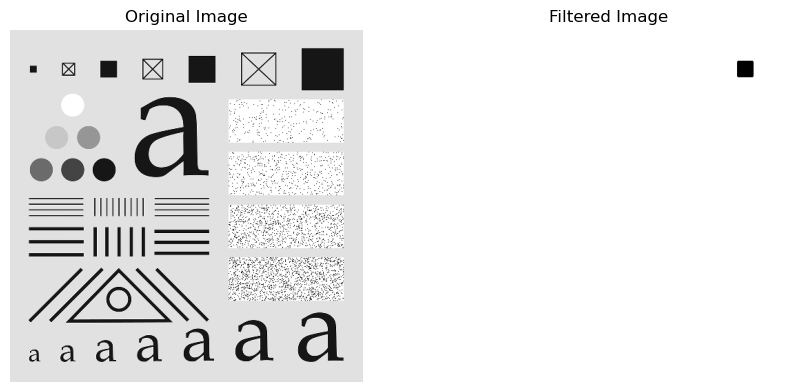

In [9]:

# Threshold the filtered image
threshold = 0.111*256
filtered_image = np.where(convolved_image >= threshold,1,0)
filtered_image = filtered_image.reshape(512,512)

# Plot the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')
plt.show()


## Bonus 1

### Part A

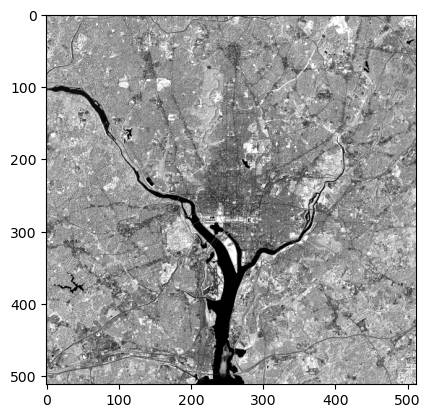

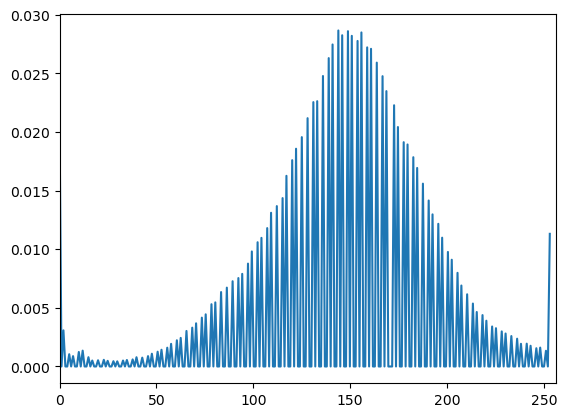

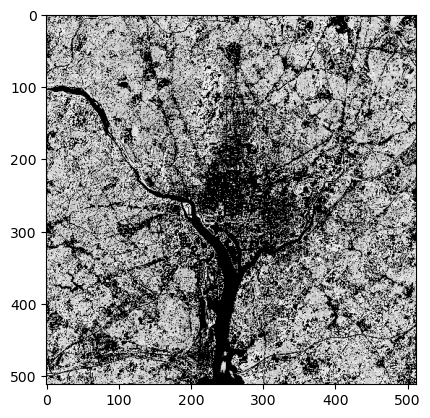

In [1]:
# Load the image
img = io.imread('Washington.tif', as_gray=True)

# Display the image
plt.imshow(img, cmap='gray')
plt.show()

# Calculate the histogram and normalized histogram
hist, bins = np.histogram(img, bins=256, density=True)
pdf = hist / hist.sum()

# Plot the PDF
plt.plot(bins[:-1], pdf)
plt.xlim([0, 256])
plt.show()

# Perform intensity-level slicing
mask = np.logical_and(img >= 128, img <= 192)
sliced_img = np.zeros_like(img)
sliced_img[mask] = img[mask]

# Display the sliced image
plt.imshow(sliced_img, cmap='gray')
plt.show()


In [ ]:
### Part B

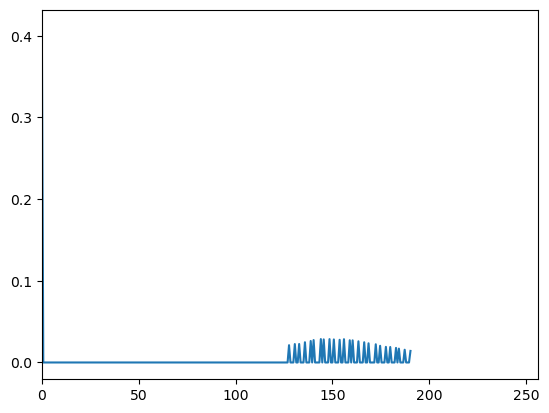

In [2]:
# Load the image
img = io.imread('Washington.tif', as_gray=True)

# Perform intensity-level slicing
mask = np.logical_and(img >= 128, img <= 192)
sliced_img = np.zeros_like(img)
sliced_img[mask] = img[mask]

# Calculate the histogram and normalized histogram of the sliced image
hist, bins = np.histogram(sliced_img, bins=256, density=True)
pdf = hist / hist.sum()

# Plot the PDF of the sliced image
plt.plot(bins[:-1], pdf)
plt.xlim([0, 256])
plt.show()

### Part C

By selecting a specific range of intensity values and blocking the rest, the transformed image will contain only the pixels with intensities within the selected range, and the rest of the image will be set to zero.